In [4]:
# Import necessary libraries
import numpy as np       # Numerical operations
import matplotlib.pyplot as plt  # Plotting library

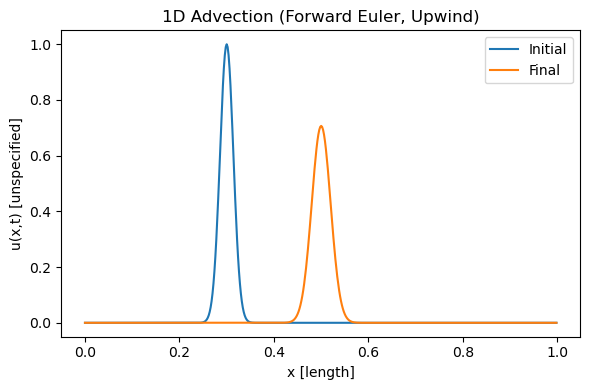

In [115]:
# --------------------------------------------------
# Numerical parameters
# --------------------------------------------------

# Number of spatial grid points
nx = 500

# Length of the one-dimensional domain
Lx = 1.0

# Constant advection speed (assumed positive)
c = 1.0

# Spatial grid spacing
dx = Lx / nx

# Courant number controlling numerical stability
# For the upwind + Forward Euler scheme, CFL <= 1 is required
CFL = 0.5

# Time step determined from the CFL condition
dt = CFL * dx / c

# Number of time steps to evolve the solution
nt = 200

# --------------------------------------------------
# Spatial grid
# --------------------------------------------------

# Cell-centered grid on a periodic domain
x = np.linspace(0, Lx, nx, endpoint=False)

# --------------------------------------------------
# Initial condition
# --------------------------------------------------

# Initial scalar field: a Gaussian pulse
# The pulse is centered at x = 0.3 Lx with a fixed width
u = np.exp(-((x - 0.3 * Lx) ** 2) / (0.02 ** 2))

# Store the initial condition for later comparison
u_initial = u.copy()

# --------------------------------------------------
# Time integration loop
# --------------------------------------------------

# Forward Euler time stepping with first-order upwind spatial discretization
for n in range(nt):

    # Create a new array for the updated solution
    u_next = u.copy()

    # Upwind finite-difference update for interior grid points
    # Since c > 0, information propagates from left to right
    u_next[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])

    # Periodic boundary condition at the left boundary
    # The upwind stencil wraps around to the last grid point
    u_next[0] = u[0] - c * dt / dx * (u[0] - u[-1])

    # Update the solution for the next time step
    u = u_next

# --------------------------------------------------
# Visualization
# --------------------------------------------------

# Plot the initial and final states of the solution
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label="Initial")
plt.plot(x, u, label="Final")
plt.xlabel("x [length]")
plt.ylabel("u(x,t) [unspecified]")
plt.legend()
plt.title("1D Advection (Forward Euler, Upwind)")
plt.tight_layout()
plt.savefig("1D_advection_FE_upwind.png", dpi=300)
#plt.show()

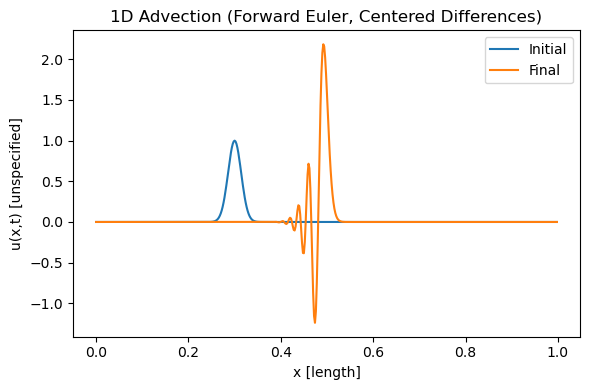

In [116]:
# --------------------------------------------------
# Numerical parameters
# --------------------------------------------------

# Number of spatial grid points
nx = 500

# Length of the one-dimensional domain
Lx = 1.0

# Constant advection speed
c = 1.0

# Spatial grid spacing
dx = Lx / nx

# Courant number used to set the time step
# Forward Euler with centered differences is unstable for advection
# This value is chosen for demonstration purposes only
CFL = 0.5

# Time step computed from the Courant number
dt = CFL * dx / c

# Number of time steps
nt = 200

# --------------------------------------------------
# Spatial grid
# --------------------------------------------------

# Cell-centered grid on a periodic domain
x = np.linspace(0, Lx, nx, endpoint=False)

# --------------------------------------------------
# Initial condition
# --------------------------------------------------

# Initial scalar field defined as a Gaussian pulse
u = np.exp(-((x - 0.3 * Lx) ** 2) / (0.02 ** 2))

# Store the initial condition for comparison
u_initial = u.copy()

# --------------------------------------------------
# Time integration loop
# --------------------------------------------------

# Forward Euler time stepping with centered spatial differences
for n in range(nt):

    # Allocate array for the updated solution
    u_next = u.copy()

    # Centered finite-difference approximation of the spatial derivative
    # Periodic indexing is used via array shifts
    du_dx = (np.roll(u, -1) - np.roll(u, 1)) / (2 * dx)

    # Forward Euler update of the advection equation
    u_next = u - c * dt * du_dx

    # Update solution for the next time step
    u = u_next

# --------------------------------------------------
# Visualization
# --------------------------------------------------

# Plot the initial and final states
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label="Initial")
plt.plot(x, u, label="Final")
plt.xlabel("x [length]")
plt.ylabel("u(x,t) [unspecified]")
plt.legend()
plt.title("1D Advection (Forward Euler, Centered Differences)")
plt.tight_layout()
plt.savefig("1D_advection_FE_centered_difference.png", dpi=300)
#plt.show()

### Iterative Crank-Nicolson Method:
Can you improve the centered-difference scheme? Implement an iterative Crank-Nicolson method as outlined in the readings for Module 4. 

- The iterated Crank-Nicolson (CN) method is a powerful tool for modeling plasmas in the fluid approximation and for testing numerical schemes more generally. It is widely used because it balances stability and computational efficiency.

- This short paper covers both stability and error analysis as well as implementation details. For the hands-on application, focus on the algorithm itself. Pay attention to the part on the number of iterations, as it provides guidance for choosing a stable configuration.

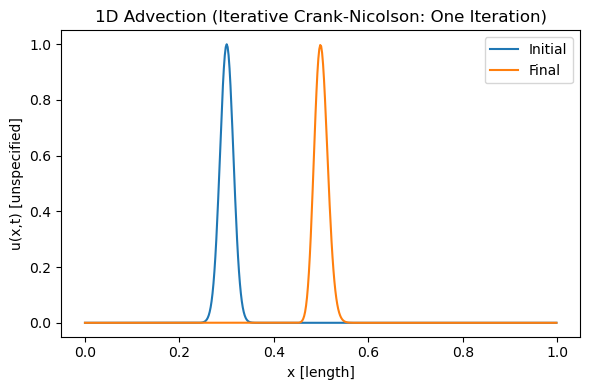

In [117]:
# --------------------------------------------------
# Numerical parameters
# --------------------------------------------------
# Number of spatial grid points
nx = 500
# Length of the one-dimensional domain
Lx = 1.0
# Constant advection speed
c = 1.0
# Spatial grid spacing
dx = Lx / nx
# Courant number used to set the time step
# Forward Euler with centered differences is unstable for advection
# This value is chosen for demonstration purposes only
CFL = 0.5
# Time step computed from the Courant number
dt = CFL * dx / c
# Number of time steps
nt = 200

# --------------------------------------------------
# Spatial grid
# --------------------------------------------------
# Cell-centered grid on a periodic domain
x = np.linspace(0, Lx, nx, endpoint=False)

# --------------------------------------------------
# Initial condition
# --------------------------------------------------
# Initial scalar field defined as a Gaussian pulse
u = np.exp(-((x - 0.3 * Lx) ** 2) / (0.02 ** 2))
# Store the initial condition for comparison
u_initial = u.copy()

# --------------------------------------------------
# Time integration loop
# --------------------------------------------------
# Crank-Nicolson time stepping with centered spatial differences
for n in range(nt):

    # Allocate array for the updated solution
    u_next = u.copy()
    
    # First Crank-Nicolson interation:

    # Eqn (8), using center different and forward euler
    du_dx_intermediate = (np.roll(u, -1) - np.roll(u, 1)) / (2 * dx)
    u_next_intermediate = u - c * dt * du_dx_intermediate

    # Eqn (9)
    u_next_avg = 0.5*(u_next_intermediate + u)

    # Eqn (10)
    du_dx_avg = (np.roll(u_next_avg, -1) - np.roll(u_next_avg, 1)) / (2 * dx)
    u_next = u - c * dt * du_dx_avg
    u = u_next # update solution for the next time step

# --------------------------------------------------
# Visualization
# --------------------------------------------------

# Plot the initial and final states
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label="Initial")
plt.plot(x, u, label="Final")
plt.xlabel("x [length]")
plt.ylabel("u(x,t) [unspecified]")
plt.legend()
plt.title("1D Advection (Iterative Crank-Nicolson: One Iteration)")
plt.tight_layout()
plt.savefig("1D_advection_CN_one_iteration.png", dpi=300)
#plt.show()

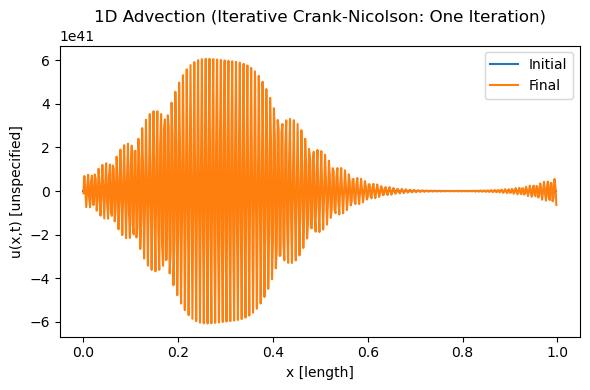

In [118]:
# INCREASED CFL AND NT
# --------------------------------------------------
# Numerical parameters
# --------------------------------------------------
# Number of spatial grid points
nx = 500
# Length of the one-dimensional domain
Lx = 1.0
# Constant advection speed
c = 1.0
# Spatial grid spacing
dx = Lx / nx
# Courant number used to set the time step
# Forward Euler with centered differences is unstable for advection
# This value is chosen for demonstration purposes only
CFL = 1.0
# Time step computed from the Courant number
dt = CFL * dx / c
# Number of time steps
nt = 1200

# --------------------------------------------------
# Spatial grid
# --------------------------------------------------
# Cell-centered grid on a periodic domain
x = np.linspace(0, Lx, nx, endpoint=False)

# --------------------------------------------------
# Initial condition
# --------------------------------------------------
# Initial scalar field defined as a Gaussian pulse
u = np.exp(-((x - 0.3 * Lx) ** 2) / (0.02 ** 2))
# Store the initial condition for comparison
u_initial = u.copy()

# --------------------------------------------------
# Time integration loop
# --------------------------------------------------
# Crank-Nicolson time stepping with centered spatial differences
for n in range(nt):

    # Allocate array for the updated solution
    u_next = u.copy()
    
    # First Crank-Nicolson interation:

    # Eqn (8), using center different and forward euler
    du_dx_intermediate = (np.roll(u, -1) - np.roll(u, 1)) / (2 * dx)
    u_next_intermediate = u - c * dt * du_dx_intermediate

    # Eqn (9)
    u_next_avg = 0.5*(u_next_intermediate + u)

    # Eqn (10)
    du_dx_avg = (np.roll(u_next_avg, -1) - np.roll(u_next_avg, 1)) / (2 * dx)
    u_next = u - c * dt * du_dx_avg
    u = u_next # update solution for the next time step

# --------------------------------------------------
# Visualization
# --------------------------------------------------

# Plot the initial and final states
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label="Initial")
plt.plot(x, u, label="Final")
plt.xlabel("x [length]")
plt.ylabel("u(x,t) [unspecified]")
plt.legend()
plt.title("1D Advection (Iterative Crank-Nicolson: One Iteration)")
plt.tight_layout()
plt.savefig("1D_advection_CN_one_iteration_CFL_nt_increased.png", dpi=300)
#plt.show()

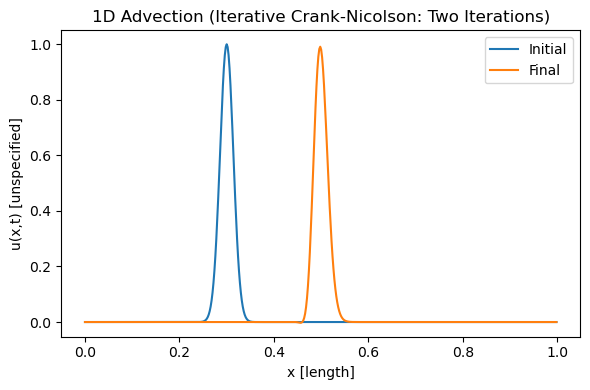

In [119]:
# --------------------------------------------------
# Numerical parameters
# --------------------------------------------------
# Number of spatial grid points
nx = 500
# Length of the one-dimensional domain
Lx = 1.0
# Constant advection speed
c = 1.0
# Spatial grid spacing
dx = Lx / nx
# Courant number used to set the time step
# Forward Euler with centered differences is unstable for advection
# This value is chosen for demonstration purposes only
CFL = 0.5
# Time step computed from the Courant number
dt = CFL * dx / c
# Number of time steps
nt = 200

# --------------------------------------------------
# Spatial grid
# --------------------------------------------------
# Cell-centered grid on a periodic domain
x = np.linspace(0, Lx, nx, endpoint=False)

# --------------------------------------------------
# Initial condition
# --------------------------------------------------
# Initial scalar field defined as a Gaussian pulse
u = np.exp(-((x - 0.3 * Lx) ** 2) / (0.02 ** 2))
# Store the initial condition for comparison
u_initial = u.copy()

# Number of steps for iterated Crank-Nicholson
n_iterations = 2
# --------------------------------------------------
# Time integration loop
# --------------------------------------------------
# Crank-Nicolson time stepping with centered spatial differences
for n in range(nt):

    # Allocate array for the updated solution
    u_next = u.copy()

    # Copy u for first iteration of Crank-Nicolson
    u_next_avg = u.copy()
    # Crank-Nicolson interations:
    for _ in range(n_iterations):
        # Eqn (8), using center different and forward euler
        du_dx_intermediate = (np.roll(u_next_avg, -1) - np.roll(u_next_avg, 1)) / (2 * dx)
        u_next_intermediate = u - c * dt * du_dx_intermediate
        # Eqn (9)
        u_next_avg = 0.5*(u_next_intermediate + u)

    # Eqn (10)
    du_dx_avg = (np.roll(u_next_avg, -1) - np.roll(u_next_avg, 1)) / (2 * dx)

    u_next = u - c * dt * du_dx_avg
    u = u_next # update solution for the next time step

# --------------------------------------------------
# Visualization
# --------------------------------------------------

# Plot the initial and final states
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label="Initial")
plt.plot(x, u, label="Final")
plt.xlabel("x [length]")
plt.ylabel("u(x,t) [unspecified]")
plt.legend()
plt.title("1D Advection (Iterative Crank-Nicolson: Two Iterations)")
plt.tight_layout()
plt.savefig("1D_advection_CN_two_iterations.png", dpi=300)
#plt.show()

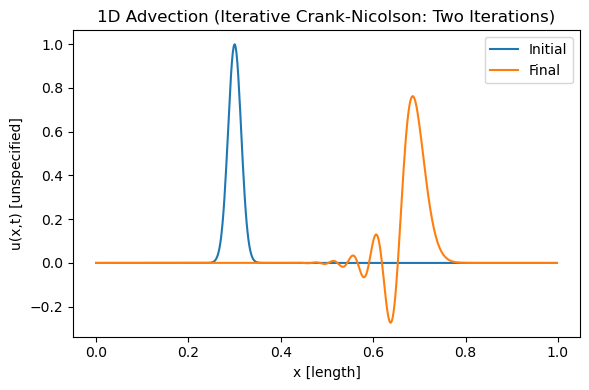

In [120]:
# INCREASED CFL AND NT
# --------------------------------------------------
# Numerical parameters
# --------------------------------------------------
# Number of spatial grid points
nx = 500
# Length of the one-dimensional domain
Lx = 1.0
# Constant advection speed
c = 1.0
# Spatial grid spacing
dx = Lx / nx
# Courant number used to set the time step
# Forward Euler with centered differences is unstable for advection
# This value is chosen for demonstration purposes only
CFL = 1.0
# Time step computed from the Courant number
dt = CFL * dx / c
# Number of time steps
nt = 1200

# --------------------------------------------------
# Spatial grid
# --------------------------------------------------
# Cell-centered grid on a periodic domain
x = np.linspace(0, Lx, nx, endpoint=False)

# --------------------------------------------------
# Initial condition
# --------------------------------------------------
# Initial scalar field defined as a Gaussian pulse
u = np.exp(-((x - 0.3 * Lx) ** 2) / (0.02 ** 2))
# Store the initial condition for comparison
u_initial = u.copy()

# Number of steps for iterated Crank-Nicholson
n_iterations = 2
# --------------------------------------------------
# Time integration loop
# --------------------------------------------------
# Crank-Nicolson time stepping with centered spatial differences
for n in range(nt):

    # Allocate array for the updated solution
    u_next = u.copy()

    # Copy u for first iteration of Crank-Nicolson
    u_next_avg = u.copy()
    # Crank-Nicolson interations:
    for _ in range(n_iterations):
        # Eqn (8), using center different and forward euler
        du_dx_intermediate = (np.roll(u_next_avg, -1) - np.roll(u_next_avg, 1)) / (2 * dx)
        u_next_intermediate = u - c * dt * du_dx_intermediate
        # Eqn (9)
        u_next_avg = 0.5*(u_next_intermediate + u)

    # Eqn (10)
    du_dx_avg = (np.roll(u_next_avg, -1) - np.roll(u_next_avg, 1)) / (2 * dx)

    u_next = u - c * dt * du_dx_avg
    u = u_next # update solution for the next time step

# --------------------------------------------------
# Visualization
# --------------------------------------------------

# Plot the initial and final states
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label="Initial")
plt.plot(x, u, label="Final")
plt.xlabel("x [length]")
plt.ylabel("u(x,t) [unspecified]")
plt.legend()
plt.title("1D Advection (Iterative Crank-Nicolson: Two Iterations)")
plt.tight_layout()
plt.savefig("1D_advection_CN_two_iterations_CFL_nt_increased.png", dpi=300)
#plt.show()

#### Investigate whether increasing the number of iterations in the Crank-Nicolson solver improves the accuracy and quality of the results.

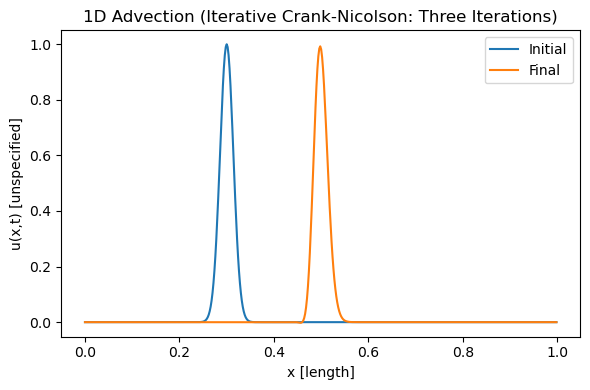

In [121]:
# --------------------------------------------------
# Numerical parameters
# --------------------------------------------------
# Number of spatial grid points
nx = 500
# Length of the one-dimensional domain
Lx = 1.0
# Constant advection speed
c = 1.0
# Spatial grid spacing
dx = Lx / nx
# Courant number used to set the time step
# Forward Euler with centered differences is unstable for advection
# This value is chosen for demonstration purposes only
CFL = 0.5
# Time step computed from the Courant number
dt = CFL * dx / c
# Number of time steps
nt = 200

# --------------------------------------------------
# Spatial grid
# --------------------------------------------------
# Cell-centered grid on a periodic domain
x = np.linspace(0, Lx, nx, endpoint=False)

# --------------------------------------------------
# Initial condition
# --------------------------------------------------
# Initial scalar field defined as a Gaussian pulse
u = np.exp(-((x - 0.3 * Lx) ** 2) / (0.02 ** 2))
# Store the initial condition for comparison
u_initial = u.copy()

# Number of steps for iterated Crank-Nicholson
n_iterations = 3
# --------------------------------------------------
# Time integration loop
# --------------------------------------------------
# Crank-Nicolson time stepping with centered spatial differences
for n in range(nt):

    # Allocate array for the updated solution
    u_next = u.copy()

    # Copy u for first iteration of Crank-Nicolson
    u_next_avg = u.copy()
    # Crank-Nicolson interations:
    for _ in range(n_iterations):
        # Eqn (8), using center different and forward euler
        du_dx_intermediate = (np.roll(u_next_avg, -1) - np.roll(u_next_avg, 1)) / (2 * dx)
        u_next_intermediate = u - c * dt * du_dx_intermediate
        # Eqn (9)
        u_next_avg = 0.5*(u_next_intermediate + u)

    # Eqn (10)
    du_dx_avg = (np.roll(u_next_avg, -1) - np.roll(u_next_avg, 1)) / (2 * dx)

    u_next = u - c * dt * du_dx_avg
    u = u_next # update solution for the next time step

# --------------------------------------------------
# Visualization
# --------------------------------------------------

# Plot the initial and final states
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label="Initial")
plt.plot(x, u, label="Final")
plt.xlabel("x [length]")
plt.ylabel("u(x,t) [unspecified]")
plt.legend()
plt.title("1D Advection (Iterative Crank-Nicolson: Three Iterations)")
plt.tight_layout()
plt.savefig("1D_advection_CN_three_iterations.png", dpi=300)
#plt.show()

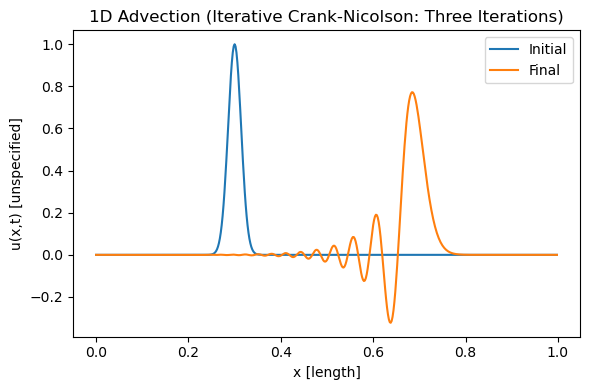

In [122]:
# INCREASED CFL AND NT
# --------------------------------------------------
# Numerical parameters
# --------------------------------------------------
# Number of spatial grid points
nx = 500
# Length of the one-dimensional domain
Lx = 1.0
# Constant advection speed
c = 1.0
# Spatial grid spacing
dx = Lx / nx
# Courant number used to set the time step
# Forward Euler with centered differences is unstable for advection
# This value is chosen for demonstration purposes only
CFL = 1.0
# Time step computed from the Courant number
dt = CFL * dx / c
# Number of time steps
nt = 1200

# --------------------------------------------------
# Spatial grid
# --------------------------------------------------
# Cell-centered grid on a periodic domain
x = np.linspace(0, Lx, nx, endpoint=False)

# --------------------------------------------------
# Initial condition
# --------------------------------------------------
# Initial scalar field defined as a Gaussian pulse
u = np.exp(-((x - 0.3 * Lx) ** 2) / (0.02 ** 2))
# Store the initial condition for comparison
u_initial = u.copy()

# Number of steps for iterated Crank-Nicholson
n_iterations = 3
# --------------------------------------------------
# Time integration loop
# --------------------------------------------------
# Crank-Nicolson time stepping with centered spatial differences
for n in range(nt):

    # Allocate array for the updated solution
    u_next = u.copy()

    # Copy u for first iteration of Crank-Nicolson
    u_next_avg = u.copy()
    # Crank-Nicolson interations:
    for _ in range(n_iterations):
        # Eqn (8), using center different and forward euler
        du_dx_intermediate = (np.roll(u_next_avg, -1) - np.roll(u_next_avg, 1)) / (2 * dx)
        u_next_intermediate = u - c * dt * du_dx_intermediate
        # Eqn (9)
        u_next_avg = 0.5*(u_next_intermediate + u)

    # Eqn (10)
    du_dx_avg = (np.roll(u_next_avg, -1) - np.roll(u_next_avg, 1)) / (2 * dx)

    u_next = u - c * dt * du_dx_avg
    u = u_next # update solution for the next time step

# --------------------------------------------------
# Visualization
# --------------------------------------------------

# Plot the initial and final states
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label="Initial")
plt.plot(x, u, label="Final")
plt.xlabel("x [length]")
plt.ylabel("u(x,t) [unspecified]")
plt.legend()
plt.title("1D Advection (Iterative Crank-Nicolson: Three Iterations)")
plt.tight_layout()
plt.savefig("1D_advection_CN_three_iterations_CFL_nt_increased.png", dpi=300)
#plt.show()

#### Quantify the convergence rate of the upwind forward Euler scheme and the iterated Crank-Nicolson scheme. To do this, compute the infinity norm 
$$\parallel \psi - \psi_{real} \parallel_{\infty}\ =\ max\ |\psi_i - \psi_{i,\ real}|$$
    
#### for a range of grid resolutions. Plot the resulting errors against grid resolution on a log-log scale, and determine the slope of the line to obtain the rate of convergence.

In [46]:
# --------------------------------------------------
# Numerical parameters
# --------------------------------------------------
# Number of spatial grid points
nx = 500
# Length of the one-dimensional domain
Lx = 1.0
# Constant advection speed (assumed positive)
c = 1.0
# Courant number controlling numerical stability
# For the upwind + Forward Euler scheme, CFL <= 1 is required
CFL = 0.5
# Time step determined from the CFL condition
dt = CFL * dx / c
# Number of time steps to evolve the solution
nt = 200
# --------------------------------------------------
# Spatial grid
# --------------------------------------------------
# Cell-centered grid on a periodic domain
x = np.linspace(0, Lx, nx, endpoint=False)
# --------------------------------------------------
# Initial condition
# --------------------------------------------------
# Initial scalar field: a Gaussian pulse
# The pulse is centered at x = 0.3 Lx with a fixed width
u = np.exp(-((x - 0.3 * Lx) ** 2) / (0.02 ** 2))
# Store the initial condition for later comparison
u_initial = u.copy()

In [109]:
def FE_upwind(u, c, dt, dx, nt):
    ' Forward Euler time stepping with first-order upwind spatial discretization '

    for n in range(nt):
        u_next = u.copy() # Create a new array for the updated solution

        # Upwind finite-difference update for interior grid points
        # Since c > 0, information propagates from left to right
        u_next[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])

        # Periodic boundary condition at the left boundary
        # The upwind stencil wraps around to the last grid point
        u_next[0] = u[0] - c * dt / dx * (u[0] - u[-1])

        u = u_next # Update the solution for the next time step
    return(u)

nx_values = np.ceil(np.geomspace(100, 20000, num=20)).astype(int)
errors_upwind = []
dx_upwind = []
t_final = 0.5 * Lx / c # fix physical time to advect half the domain

for nx in nx_values:
    dx = Lx / nx
    dt = CFL * dx / c
    nt = int(t_final / dt)

    x = np.linspace(0, Lx, nx, endpoint=False)
    u = np.exp(-((x - 0.3 * Lx) ** 2) / (0.05 ** 2)) #### Increase sigma from 0.02

    (u_upwind) = FE_upwind(u, c, dt, dx, nt)

    # exact solution
    t_actual = nt * dt
    x_shifted = (x - c * t_actual) % Lx
    u_exact = np.exp(-((x_shifted - 0.3 * Lx) ** 2) / (0.05 ** 2)) #### Increase sigma from 0.02

    error = np.max(np.abs(u_upwind - u_exact))
    errors_upwind.append(error)
    dx_upwind.append(dx)

    p_upwind = np.polyfit(np.log(dx_upwind), np.log(errors_upwind), 1)[0]
    print("Observed order:", p_upwind)

/scratch/f005d7s/ipykernel_1120653/3428825860.py:42: RankWarning: Polyfit may be poorly conditioned
  p_upwind = np.polyfit(np.log(dx_upwind), np.log(errors_upwind), 1)[0]


Observed order: 0.0933397863376427
Observed order: 0.5123896012350618
Observed order: 0.5158588632745964
Observed order: 0.5436630959475561
Observed order: 0.5732971315293652
Observed order: 0.6022755450681994
Observed order: 0.6303445605436416
Observed order: 0.6570241780356092
Observed order: 0.6822353421101648
Observed order: 0.7058997399595284
Observed order: 0.7278838334344673
Observed order: 0.7482250728147757
Observed order: 0.7669549872126427
Observed order: 0.7841493053224123
Observed order: 0.7998868406266689
Observed order: 0.8142679493164833
Observed order: 0.8273975729936109
Observed order: 0.8393809841571689
Observed order: 0.8503168105651018
Observed order: 0.860300938407963


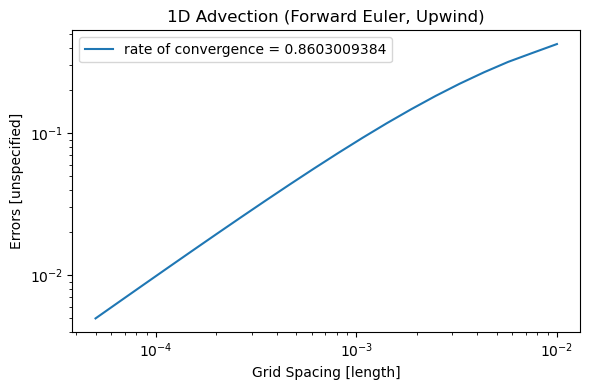

In [112]:
' Plot the errors vs. grid resolution on log-log plot '

plt.figure(figsize=(6, 4))
plt.loglog(dx_upwind, errors_upwind, label = f"rate of convergence = {p_upwind:.10f}")
plt.xlabel("Grid Spacing [length]")
plt.ylabel("Errors [unspecified]")
plt.legend()
plt.title("1D Advection (Forward Euler, Upwind)")
plt.tight_layout()
plt.savefig("1D_advection_convergence_FEu.png", dpi=300)
#plt.show()

In [113]:
def CN_centered(u, c, dt, dx, nt, n_iterations):
    ' Crank-Nicolson time stepping with centered spatial differences '

    for n in range(nt):
        u_next = u.copy() # Create a new array for the updated solution
        u_next_avg = u.copy() # Copy u for first iteration of Crank-Nicolson
    
        # Crank-Nicolson interations:
        for _ in range(n_iterations):
            # Eqn (8), using center different and forward euler
            du_dx_intermediate = (np.roll(u_next_avg, -1) - np.roll(u_next_avg, 1)) / (2 * dx)
            u_next_intermediate = u - c * dt * du_dx_intermediate
            # Eqn (9)
            u_next_avg = 0.5*(u_next_intermediate + u)

        # Eqn (10)
        du_dx_avg = (np.roll(u_next_avg, -1) - np.roll(u_next_avg, 1)) / (2 * dx)

        u_next = u - c * dt * du_dx_avg
        u = u_next # update solution for the next time step
    return(u)

nx_values = np.ceil(np.geomspace(100, 20000, num=20)).astype(int)
errors_icn = []
dx_icn = []
t_final = 0.25 * Lx / c # fix physical time to advect half the domain

for nx in nx_values:
    dx = Lx / nx
    dt = CFL * dx / c
    nt = int(t_final / dt)

    x = np.linspace(0, Lx, nx, endpoint=False)
    #u = np.sin(2*np.pi*x/Lx)
    u = np.exp(-((x - 0.3 * Lx) ** 2) / (0.05 ** 2))
    
    n_iterations = 2 # Number of steps for iterated Crank-Nicholson
    (u_icn) = CN_centered(u, c, dt, dx, nt, n_iterations)

    # exact solution
    t_actual = nt * dt
    x_shifted = (x - c * t_actual) % Lx
    #u_exact = np.sin(2*np.pi*(x_shifted)/Lx)
    u_exact = np.exp(-((x_shifted - 0.3 * Lx) ** 2) / (0.05 ** 2))

    error = np.max(np.abs(u_icn - u_exact))
    errors_icn.append(error)
    dx_icn.append(dx)

    p_icn = np.polyfit(np.log(dx_icn), np.log(errors_icn), 1)[0]
    print("Observed order:", p_icn)

/scratch/f005d7s/ipykernel_1120653/804055540.py:50: RankWarning: Polyfit may be poorly conditioned
  p_icn = np.polyfit(np.log(dx_icn), np.log(errors_icn), 1)[0]


Observed order: 0.21312491657724994
Observed order: 1.9196454326150112
Observed order: 1.9136713256369662
Observed order: 1.9365158348506295
Observed order: 1.9536280747093506
Observed order: 1.9670727128993255
Observed order: 1.9770926328979506
Observed order: 1.9833462028794921
Observed order: 1.987485819464302
Observed order: 1.9903474823163094
Observed order: 1.9922702565658374
Observed order: 1.9937483910824312
Observed order: 1.9948074224985464
Observed order: 1.9956252373516952
Observed order: 1.9962873212141194
Observed order: 1.996798062392845
Observed order: 1.9972120053615678
Observed order: 1.9975573819015982
Observed order: 1.9978421061516265
Observed order: 1.9980771041164376


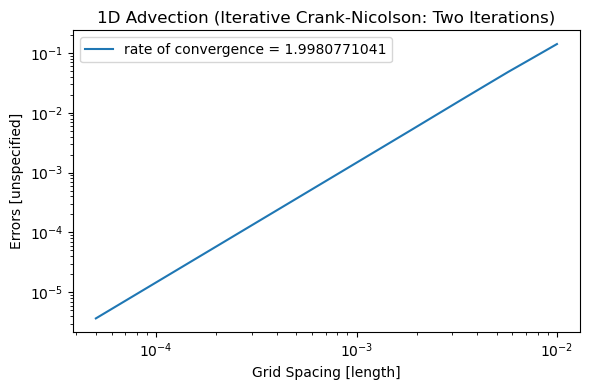

In [114]:
' Plot the errors vs. grid resolution on log-log plot '

plt.figure(figsize=(6, 4))
plt.loglog(dx_icn, errors_icn, label = f"rate of convergence = {p_icn:.10f}")
plt.xlabel("Grid Spacing [length]")
plt.ylabel("Errors [unspecified]")
plt.legend()
plt.title("1D Advection (Iterative Crank-Nicolson: Two Iterations)")
plt.tight_layout()
plt.savefig("1D_advection_convergence_ICN_2iterations.png", dpi=300)
#plt.show()